In [39]:
import os
import sys
import random
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision.transforms as T
import torch.optim as optim
import torch.utils.data as data
import torchvision
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from tqdm.notebook import tqdm_notebook
import torchvision.transforms.functional as Fun




In [40]:
image_size = 28
embed_dim=255
hidden_dim=embed_dim*3
num_heads=3
num_layers=6
patch_size=7
num_patches=16
num_channels=1
num_classes=10
dropout=0.2
BATCH_SIZE = 32

In [41]:
'''MNIST_preprocess = T.Compose([
    T.RandomApply([
        T.RandomChoice([
            T.RandomRotation(degrees=(90, 90)),   
            T.RandomRotation(degrees=(180, 180)), 
            T.RandomRotation(degrees=(270, 270))  
            ])
    ], p=0.5),  
    
    T.RandomApply([
        T.RandomAffine(degrees=0, translate=(0.1, 0.1))
    ], p=0.5),
    T.ToTensor(),
    T.Normalize((0.5,), (0.5,))
    ])'''

MNIST_preprocess = T.Compose([
    T.ToTensor(),
    T.Normalize((0.5,), (0.5,))
    ])

# download FashionMNIST training set and reserve 50000 for training
train_dataset = torchvision.datasets.FashionMNIST(root='./data/torchvision/FashionMNIST/training', train=True, download=True, transform=MNIST_preprocess)
train_set, val_set = torch.utils.data.random_split(train_dataset, [50000, 10000])

# download Fashion MNIST test set
test_set = torchvision.datasets.FashionMNIST(root='./data/torchvision/FashionMNIST/testing', train=False, download=True, transform=MNIST_preprocess)

# dataloaders
train_loader = torch.utils.data.DataLoader(dataset=train_set, batch_size=BATCH_SIZE, shuffle=True)
val_loader = torch.utils.data.DataLoader(dataset=val_set, batch_size=BATCH_SIZE, shuffle=False)
test_loader = torch.utils.data.DataLoader(dataset=test_set, batch_size=BATCH_SIZE, shuffle=False)

In [42]:
def random_transformation(image):
    image = Fun.to_pil_image(image)
    image = T.RandomApply([
        T.RandomChoice([
            T.RandomRotation(degrees=(90, 90)),   
            T.RandomRotation(degrees=(270, 270))  
            ])
    ],p=1)(image)
    return Fun.to_tensor(image)

In [43]:
#ORIGINAL VISUALIZATION
random.seed(42)
torch.manual_seed(42)
np.random.seed(42)

test_sample_index_1 = (test_set.targets == 1).nonzero(as_tuple=True)[0][6].item()
test_sample_index_2 = (test_set.targets == 2).nonzero(as_tuple=True)[0][6].item()
test_sample_index_3 = (test_set.targets == 3).nonzero(as_tuple=True)[0][6].item()
test_sample_index_4 = (test_set.targets == 4).nonzero(as_tuple=True)[0][6].item()
test_sample_index_5 = (test_set.targets == 5).nonzero(as_tuple=True)[0][6].item()
test_sample_index_6 = (test_set.targets == 6).nonzero(as_tuple=True)[0][6].item()
test_sample_index_7 = (test_set.targets == 7).nonzero(as_tuple=True)[0][6].item()
test_sample_index_8 = (test_set.targets == 8).nonzero(as_tuple=True)[0][6].item()
test_sample_index_9 = (test_set.targets == 9).nonzero(as_tuple=True)[0][6].item()
test_sample_index_10 = (test_set.targets == 1).nonzero(as_tuple=True)[0][8].item()
test_sample_index_11 = (test_set.targets == 2).nonzero(as_tuple=True)[0][8].item()
test_sample_index_12 = (test_set.targets == 3).nonzero(as_tuple=True)[0][8].item()
test_sample_index_13 = (test_set.targets == 4).nonzero(as_tuple=True)[0][8].item()
test_sample_index_14 = (test_set.targets == 5).nonzero(as_tuple=True)[0][8].item()
test_sample_index_15 = (test_set.targets == 6).nonzero(as_tuple=True)[0][8].item()
test_sample_index_16 = (test_set.targets == 7).nonzero(as_tuple=True)[0][8].item()
test_sample_index_17 = (test_set.targets == 8).nonzero(as_tuple=True)[0][8].item()
test_sample_index_18 = (test_set.targets == 9).nonzero(as_tuple=True)[0][8].item()
test_sample_index_19 = (test_set.targets == 1).nonzero(as_tuple=True)[0][9].item()
test_sample_index_20 = (test_set.targets == 2).nonzero(as_tuple=True)[0][9].item()
test_sample_index_21 = (test_set.targets == 3).nonzero(as_tuple=True)[0][9].item()
test_sample_index_22 = (test_set.targets == 4).nonzero(as_tuple=True)[0][9].item()
test_sample_index_23 = (test_set.targets == 5).nonzero(as_tuple=True)[0][9].item()
test_sample_index_24 = (test_set.targets == 6).nonzero(as_tuple=True)[0][9].item()
test_sample_index_25 = (test_set.targets == 7).nonzero(as_tuple=True)[0][9].item()
test_sample_index_26 = (test_set.targets == 8).nonzero(as_tuple=True)[0][9].item()
test_sample_index_27 = (test_set.targets == 9).nonzero(as_tuple=True)[0][9].item()


test_sample_indices = [
    test_sample_index_1,
    test_sample_index_2,
    test_sample_index_3,
    test_sample_index_4,
    test_sample_index_5,
    test_sample_index_6,
    test_sample_index_7,
    test_sample_index_8,
    test_sample_index_9,
    test_sample_index_10,
    test_sample_index_11,
    test_sample_index_12,
    test_sample_index_13,
    test_sample_index_14,
    test_sample_index_15,
    test_sample_index_16,
    test_sample_index_17,
    test_sample_index_18,
    test_sample_index_19,
    test_sample_index_20,
    test_sample_index_21,
    test_sample_index_22,
    test_sample_index_23,
    test_sample_index_24,
    test_sample_index_25,
    test_sample_index_26,
    test_sample_index_27
]

images = []
for i in test_sample_indices:
    images.append(test_set.data[i])


images_float = []
for i in test_sample_indices:
    images_float.append(test_set[i][0])
for i in range(len(images_float)):
    images_float[i] = images_float[i].squeeze(0)
    images_float[i] = (images_float[i] - images_float[i].min()) / (images_float[i].max() - images_float[i].min())


images_transformed_float = [0 for _ in range(len(images_float))]
for i in range(len(images_float)):
    images_transformed_float[i] = random_transformation(images_float[i]).squeeze(0)
    images_transformed_float[i] = (images_transformed_float[i] - images_transformed_float[i].min()) / (images_transformed_float[i].max() - images_transformed_float[i].min())


images_transformed = [0 for _ in range(len(images_transformed_float))]

for i in range(len(images_transformed_float)):
    images_transformed[i] = (images_transformed_float[i]*255).clamp(0, 255)
    images_transformed[i] = images_transformed[i].to(torch.uint8)
    images_transformed[i] = images_transformed[i].squeeze(0)
    

    

In [44]:
sys.path.append('./Model')
from My_ViT import img_to_patch
model = torch.load('./Training/training_transform.pth')
device = torch.device("cpu")
model = model.to(device)
print("Device:", device)
random.seed(42)
g = torch.Generator().manual_seed(2147483647)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

Device: cpu


In [45]:
def get_attention_maps (img_tensor, mode):
    img_tensor = img_tensor.to(device)
    patches = img_to_patch(img_tensor.unsqueeze(0).unsqueeze(0), patch_size=patch_size)
    patches = model.input_layer(patches.float())
    transformer_input = torch.cat((model.cls_token, patches), dim=1) + model.pos_embedding
    transformer_input_expanded = model.transformer[0].linear[0](transformer_input).squeeze(0)
    qkv = transformer_input_expanded.reshape(num_patches+1, 3, num_heads, -1)
    q = qkv[:, 0].permute(1, 0, 2)
    k = qkv[:, 1].permute(1, 0, 2)
    kT = k.permute(0, 2, 1)
    attention_matrix = q @ kT
    if mode == "mean":
        attention_matrix = torch.mean(attention_matrix, dim=0)
    elif mode == "min":
        attention_matrix, _ = torch.min(attention_matrix, dim=0)
    elif mode == "max":
        attention_matrix, _ = torch.max(attention_matrix, dim=0)

    residual_att = torch.eye(attention_matrix.size(1)).to(device)
    aug_att_mat = attention_matrix + residual_att
    aug_att_mat = aug_att_mat / aug_att_mat.sum(dim=-1).unsqueeze(-1)
    attn_heatmap = aug_att_mat[0, 1:].reshape((int(image_size/patch_size), int(image_size/patch_size)))
    attn_heatmap_resized = F.interpolate(attn_heatmap.unsqueeze(0).unsqueeze(0), [image_size, image_size], mode='bilinear').view(28, 28, 1)
    attn_heatmap_resized = attn_heatmap_resized - attn_heatmap_resized.min()
    attn_heatmap_resized = attn_heatmap_resized / attn_heatmap_resized.max()
    return attn_heatmap_resized

In [46]:
mean_attention_maps = []
for i in images:
    mean_attention_maps.append(get_attention_maps(i, "mean"))

In [47]:
augmented_attention_maps = []
for i in images_transformed:
    augmented_attention_maps.append(get_attention_maps(i, "mean"))

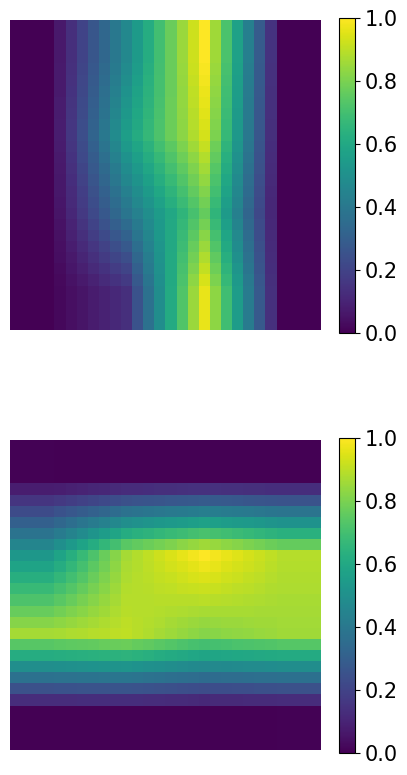

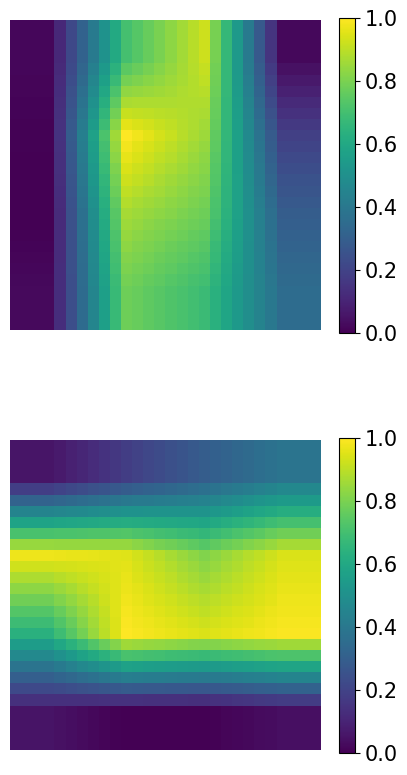

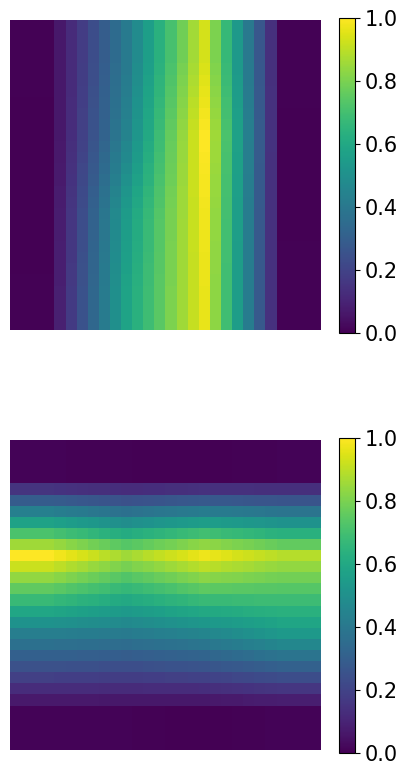

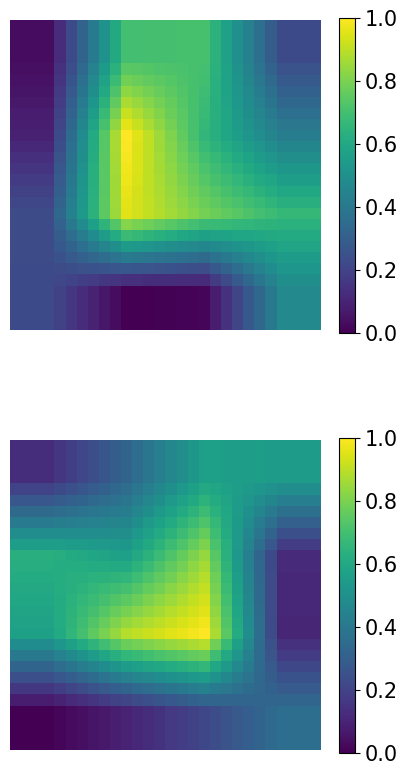

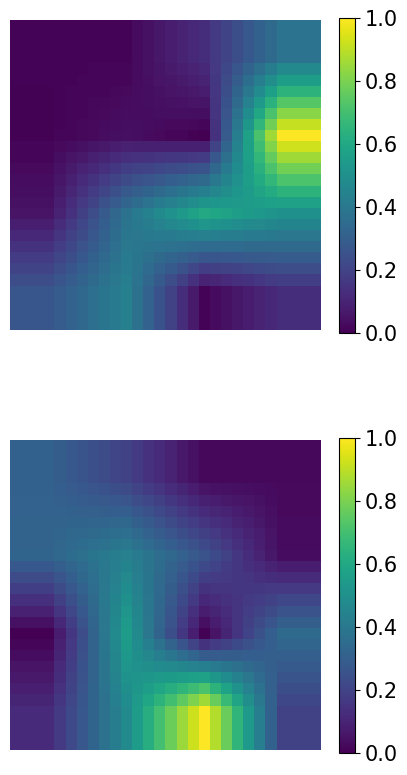

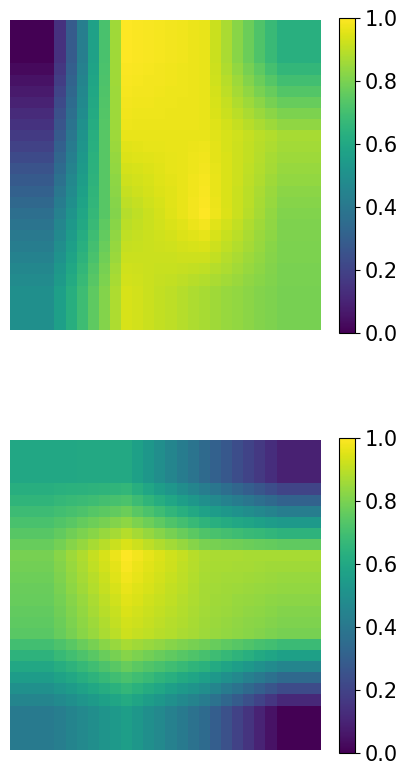

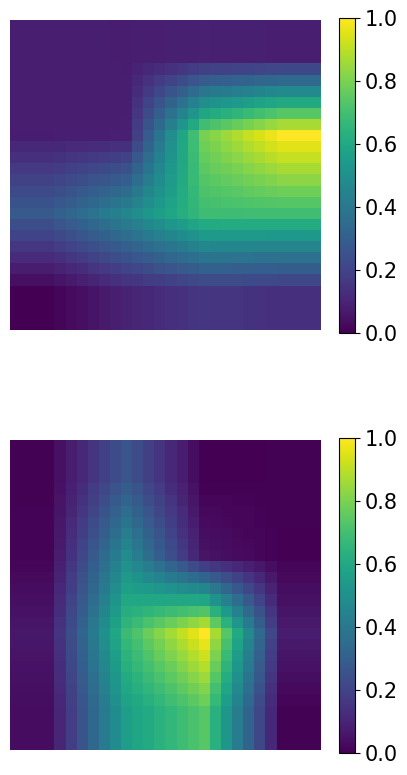

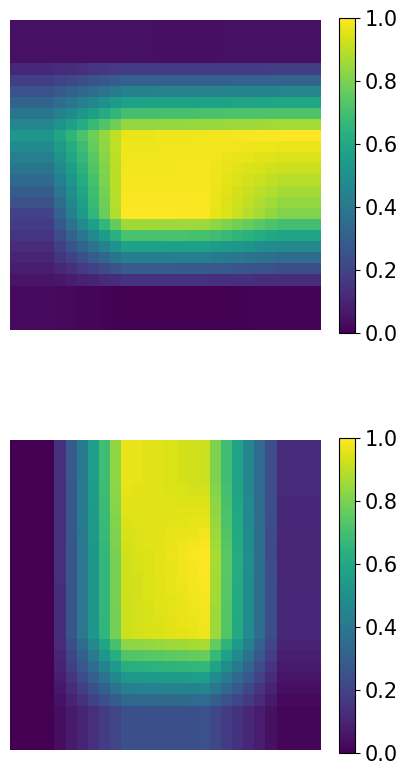

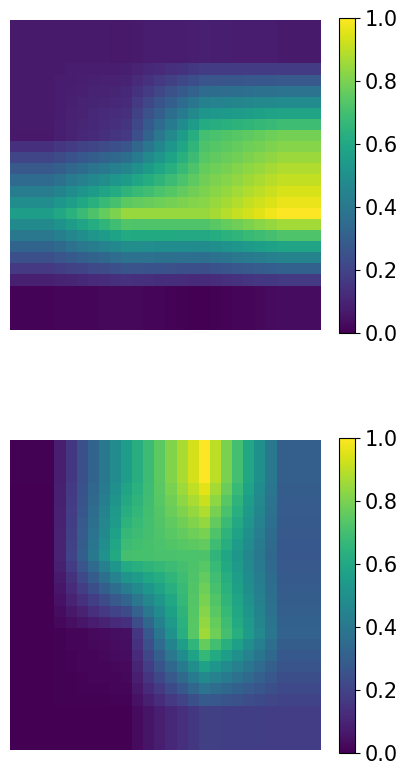

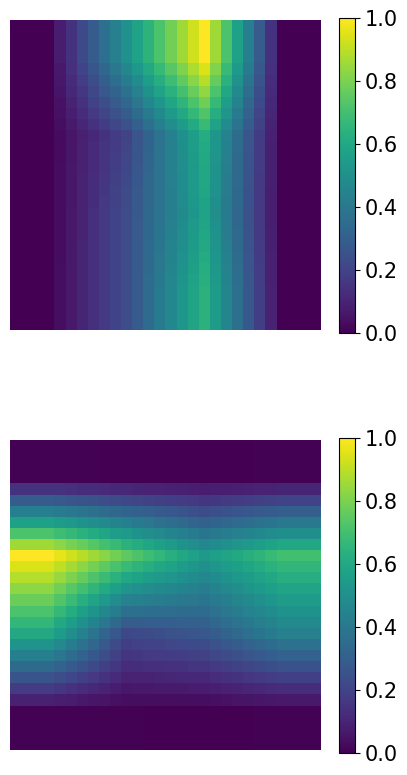

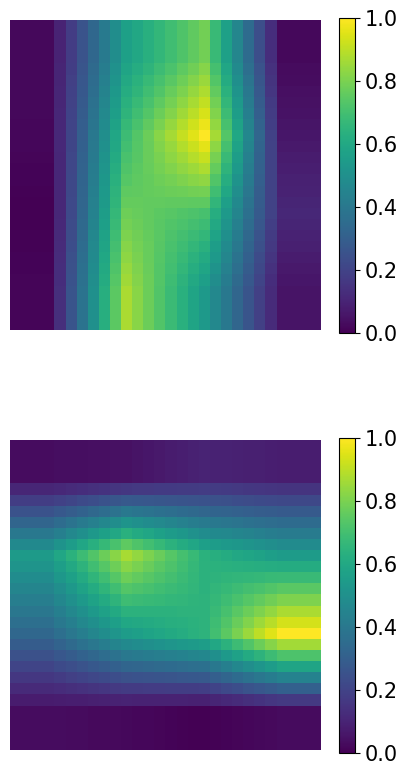

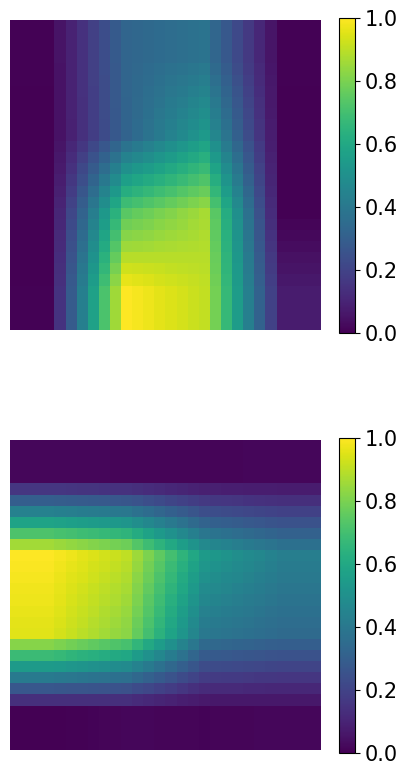

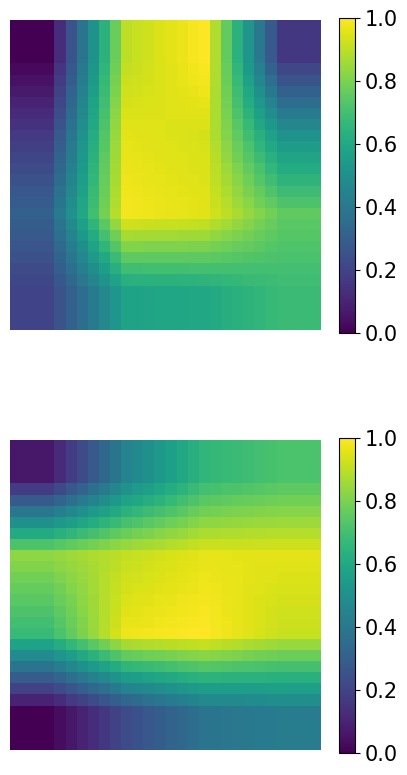

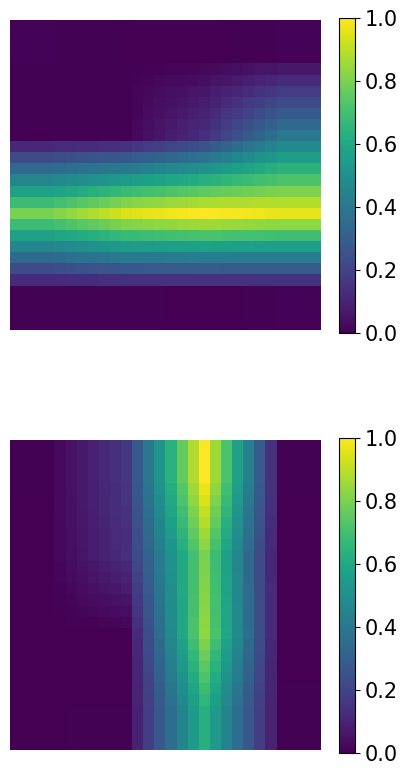

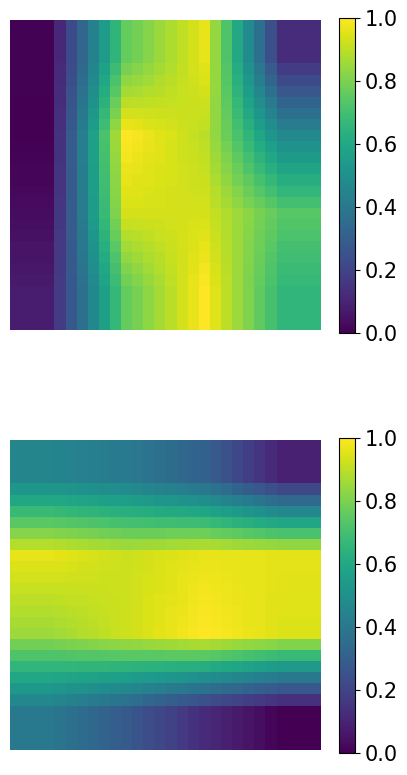

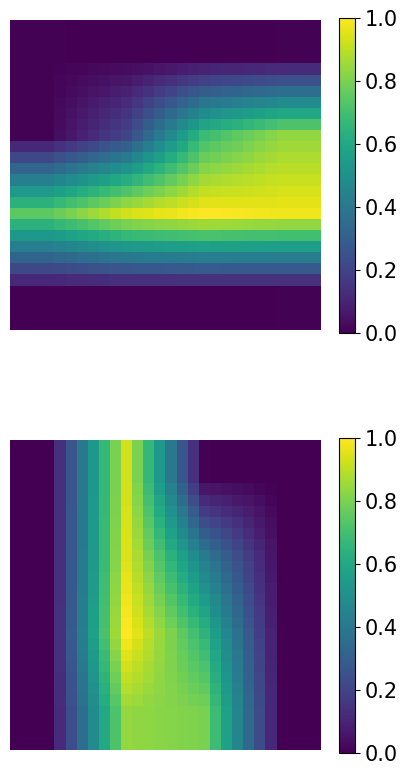

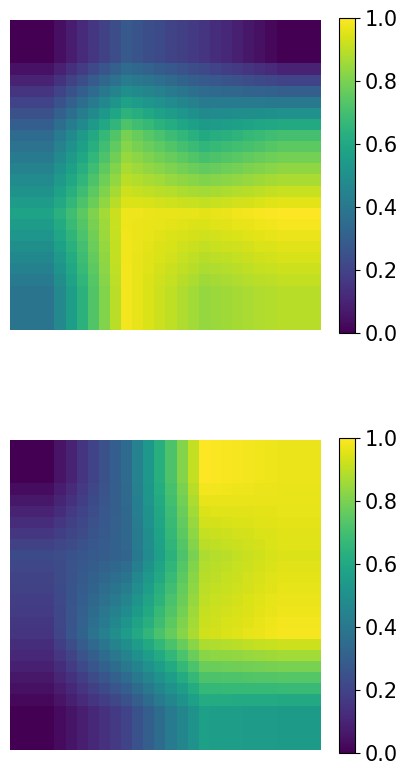

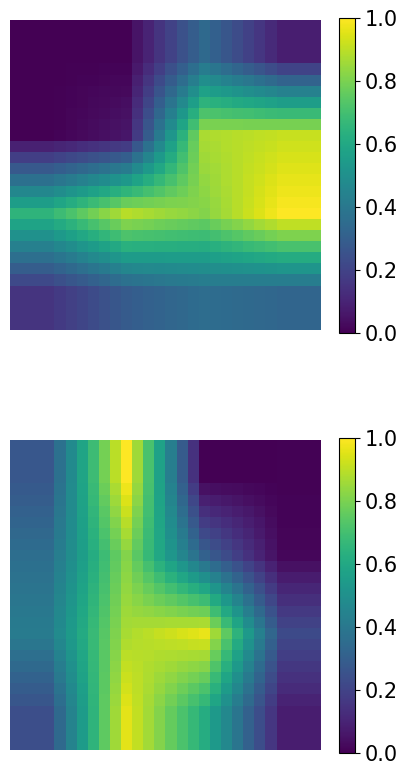

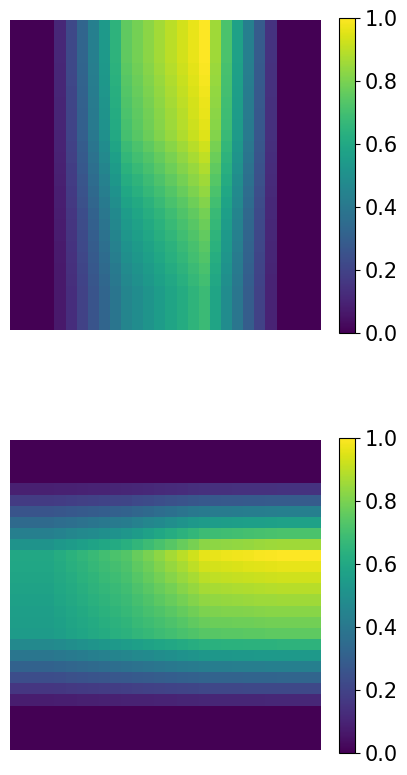

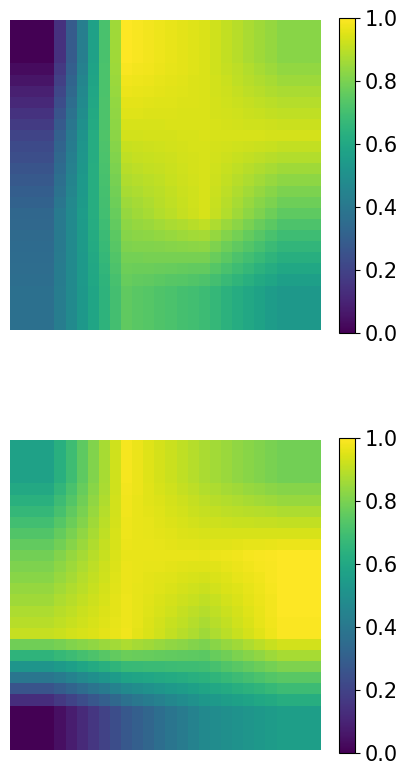

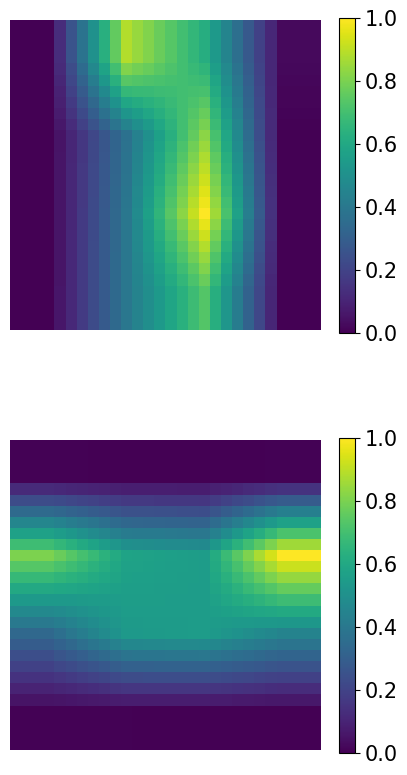

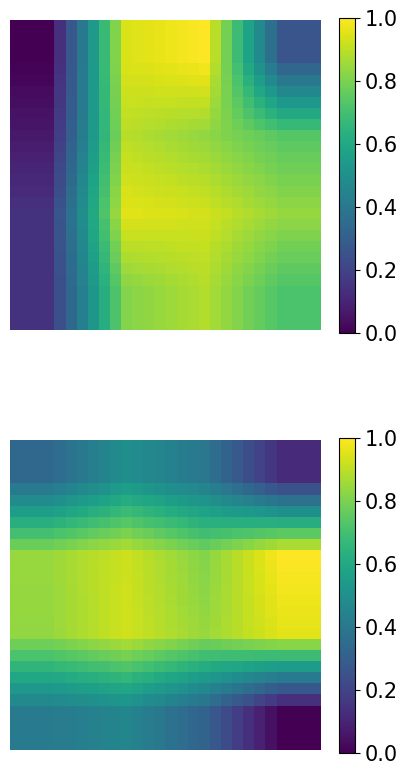

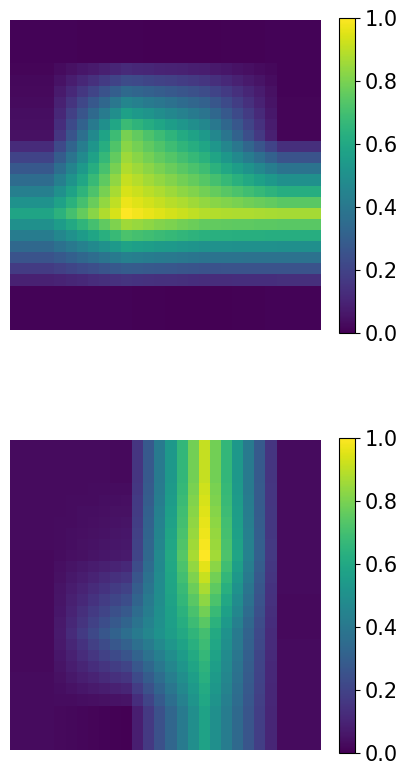

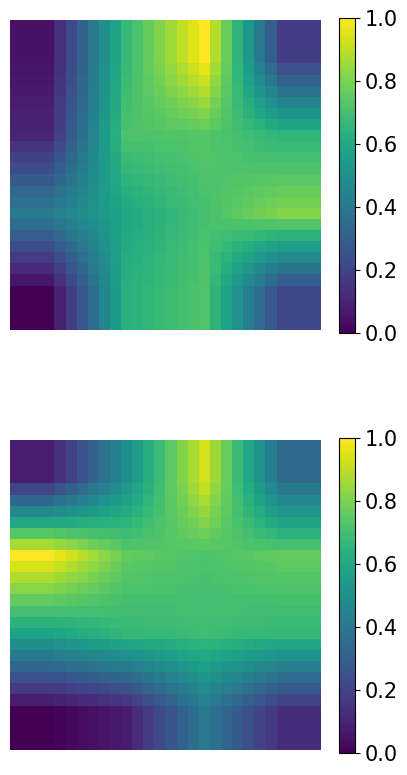

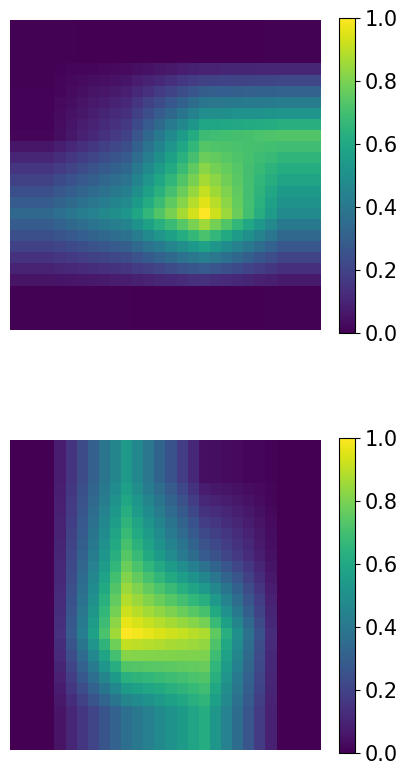

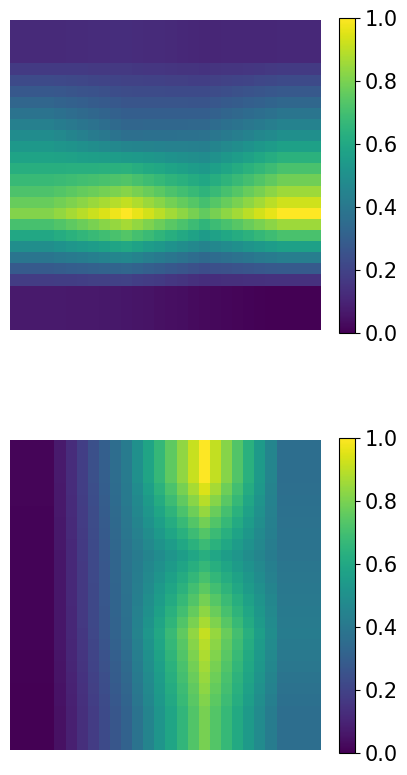

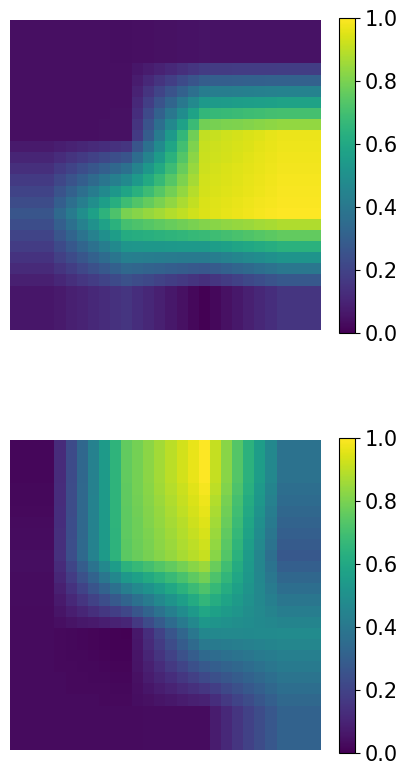

In [48]:
fontsize = 35
labelsize = 15
for i in range(len(mean_attention_maps)):
    fig, axes = plt.subplots(2, 1, figsize=(5, 10))
    #fig.suptitle('Trained with \ntransformations', fontsize=fontsize)


    # Plot attention map for original image
    axes[0].axis('off')
    im = axes[0].imshow(mean_attention_maps[i].detach().cpu().numpy(), cmap='viridis')
    cbar = fig.colorbar(im, ax=axes[0], shrink=0.9)
    cbar.ax.tick_params(labelsize=labelsize)


    # Plot attention map for perturbed image
    axes[1].axis('off')
    im = axes[1].imshow(augmented_attention_maps[i].detach().cpu().numpy(), cmap='viridis')
    cbar = fig.colorbar(im, ax=axes[1], shrink=0.9)
    cbar.ax.tick_params(labelsize=labelsize)
    plt.savefig(f'./IMAGES/EQUIVARIANZA/training_transform{i}.png')

    plt.show()

torch.Size([28, 28, 1])
torch.Size([28, 28])
torch.Size([28, 28])
torch.Size([28, 28])


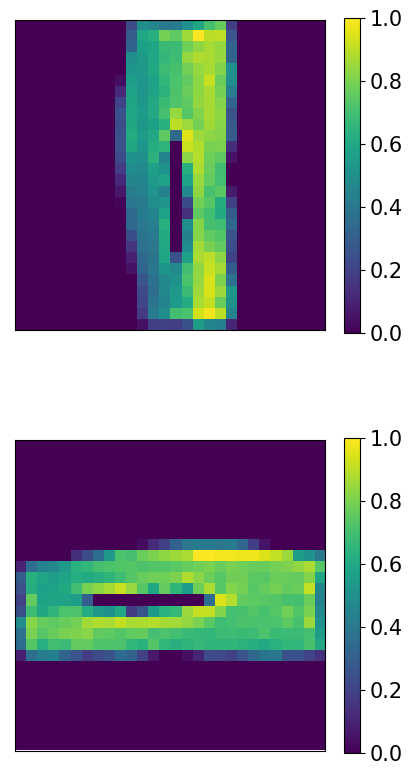

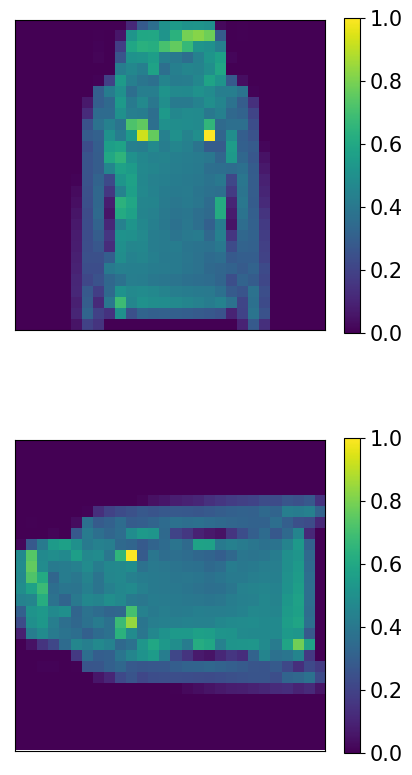

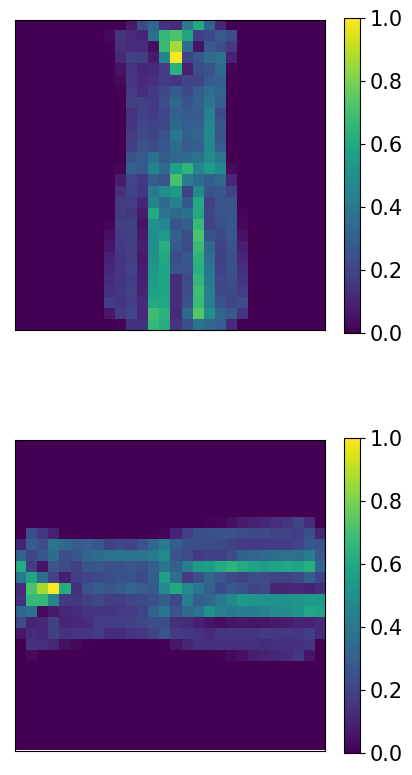

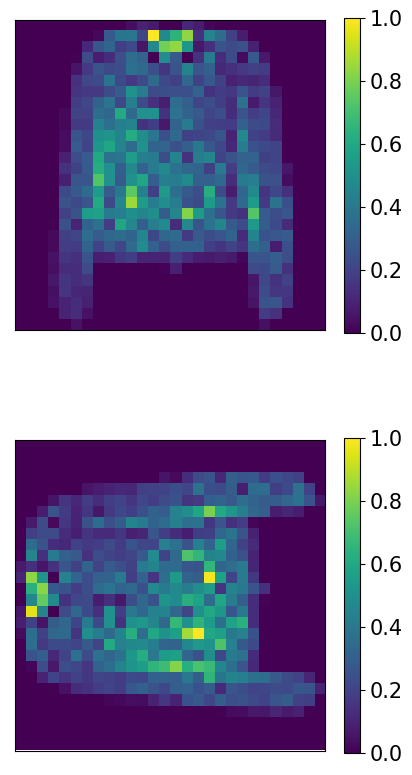

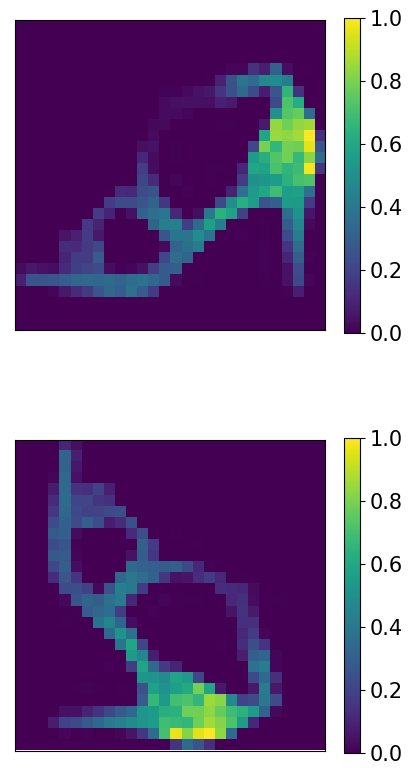

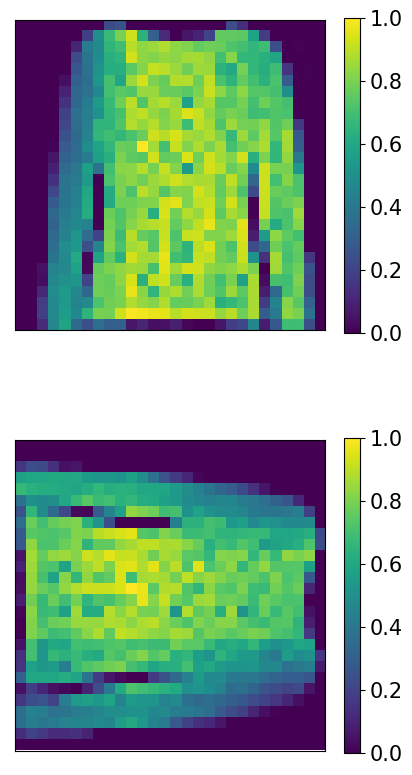

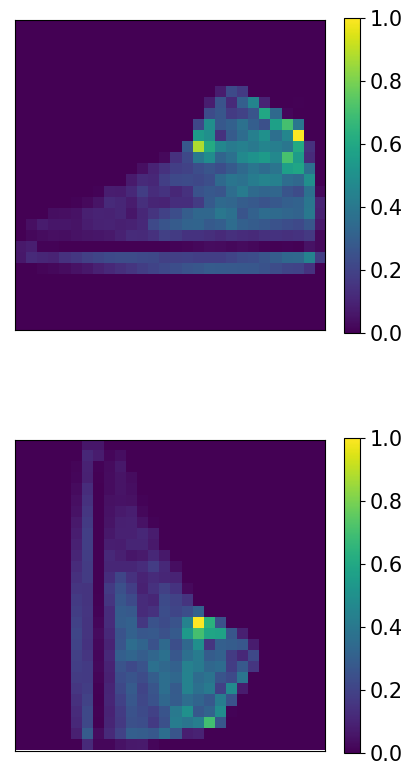

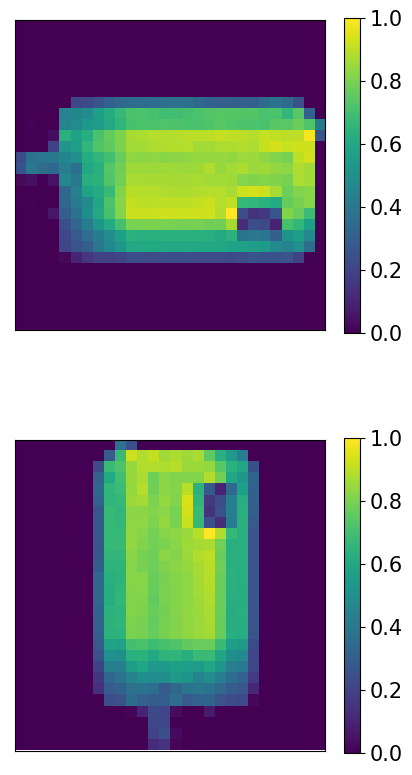

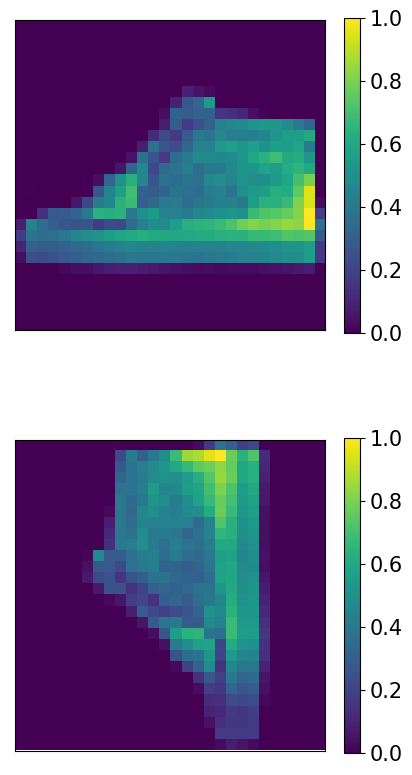

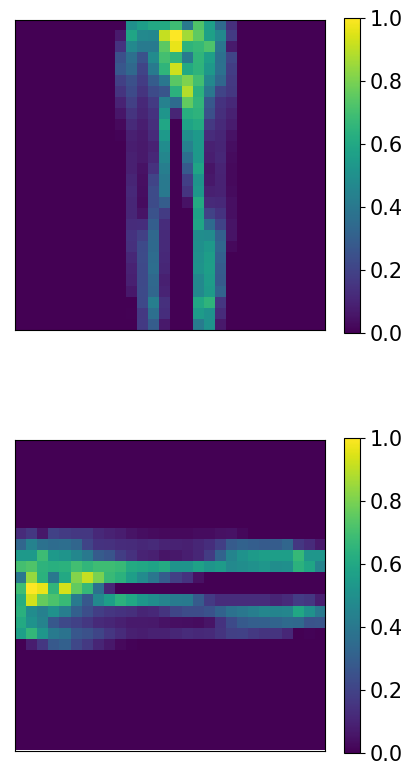

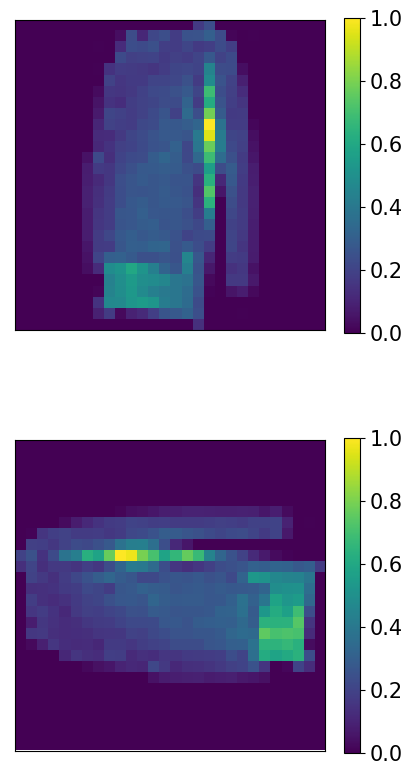

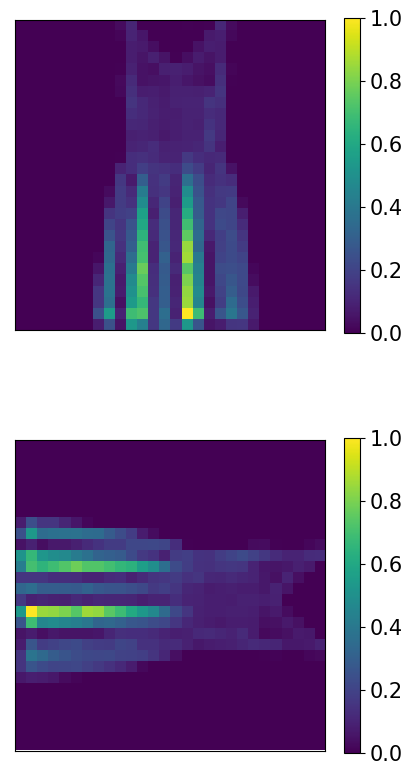

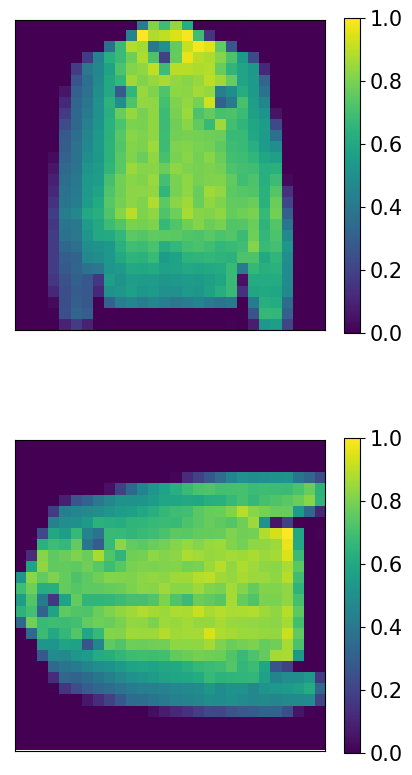

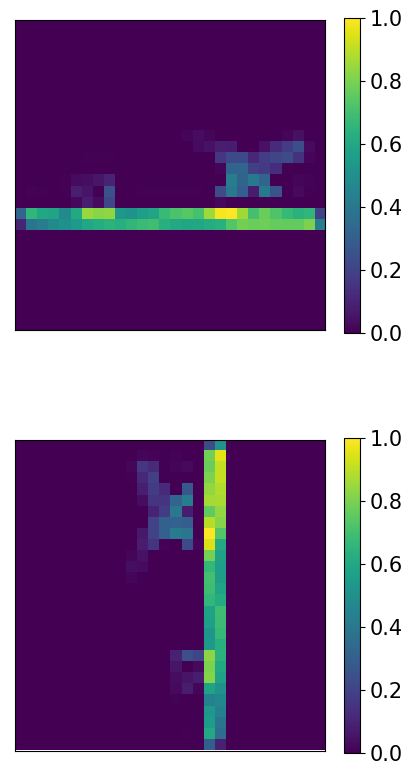

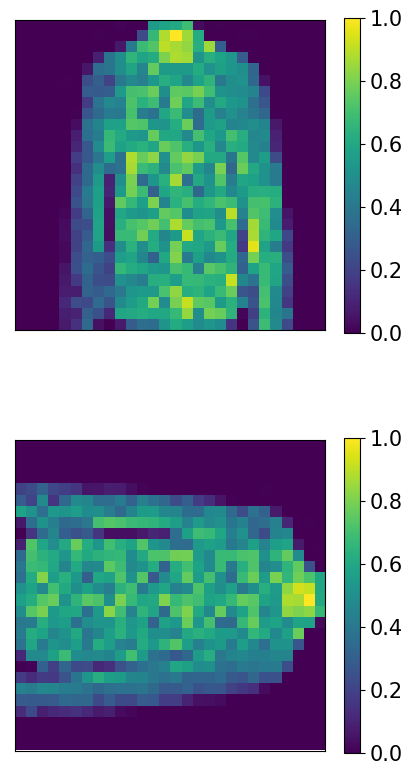

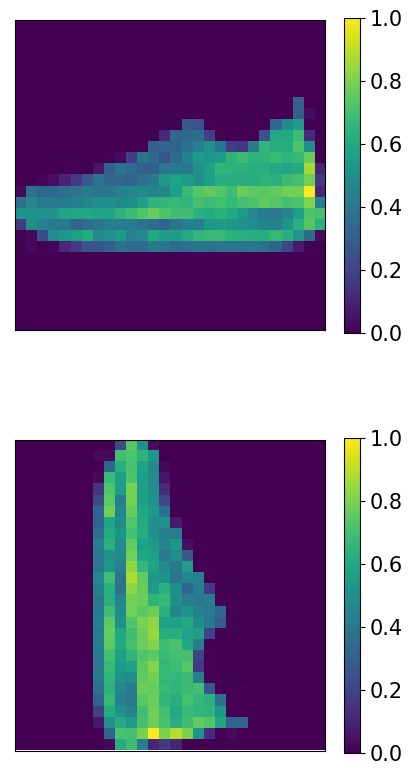

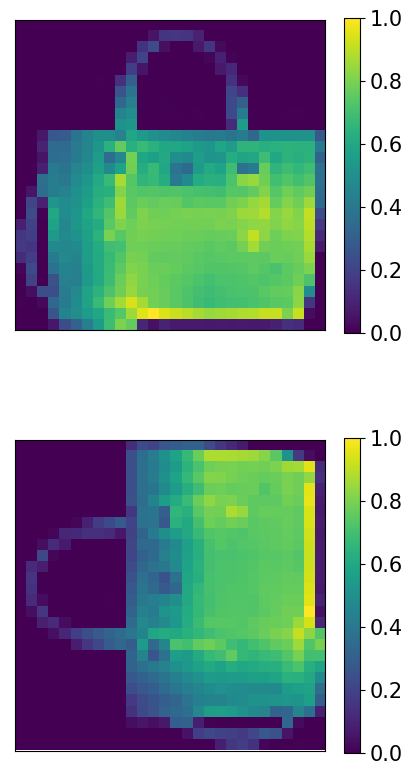

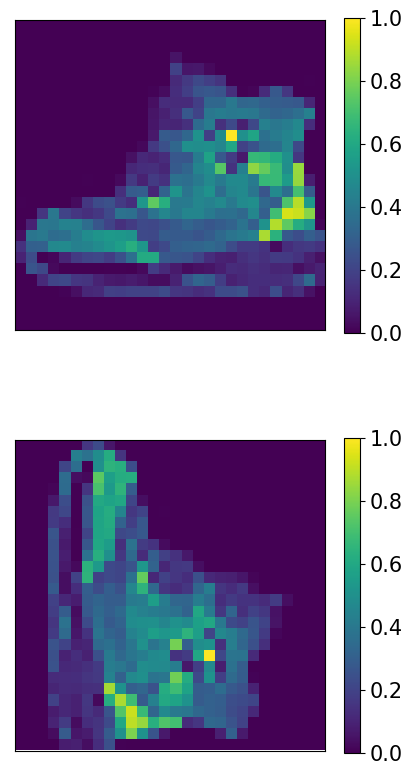

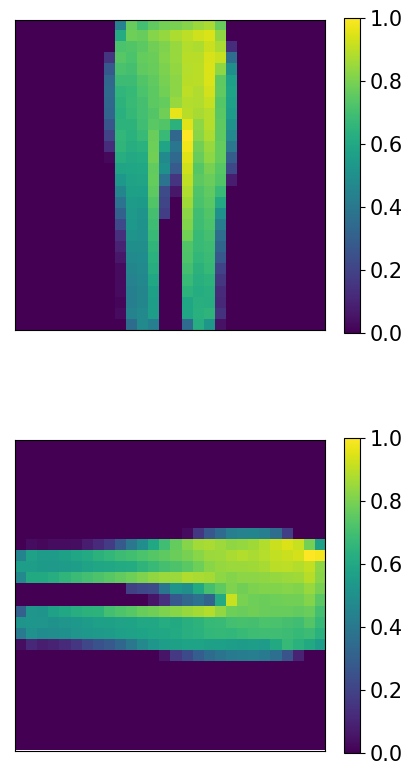

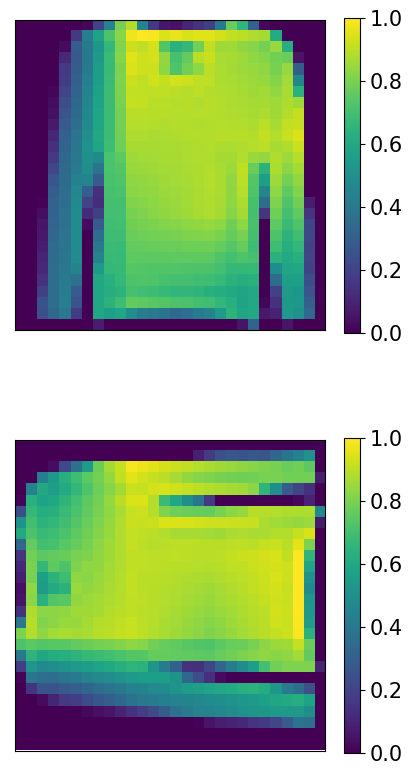

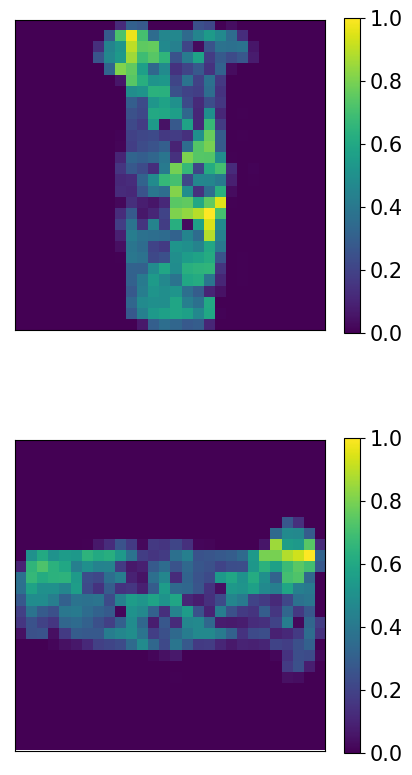

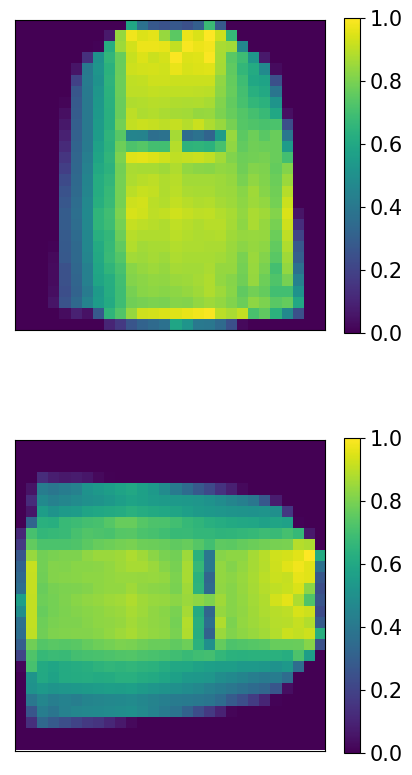

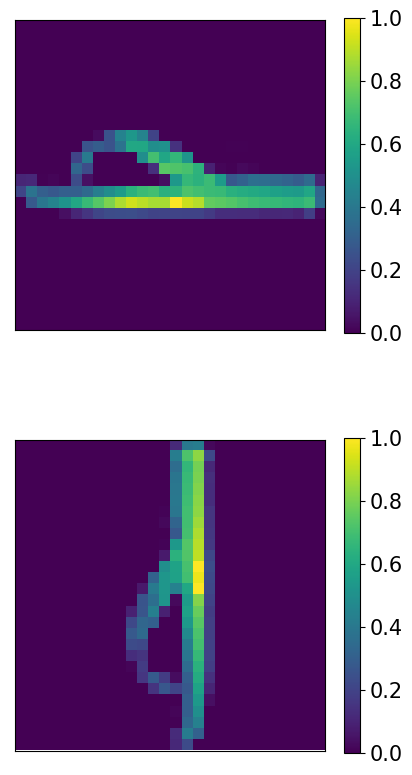

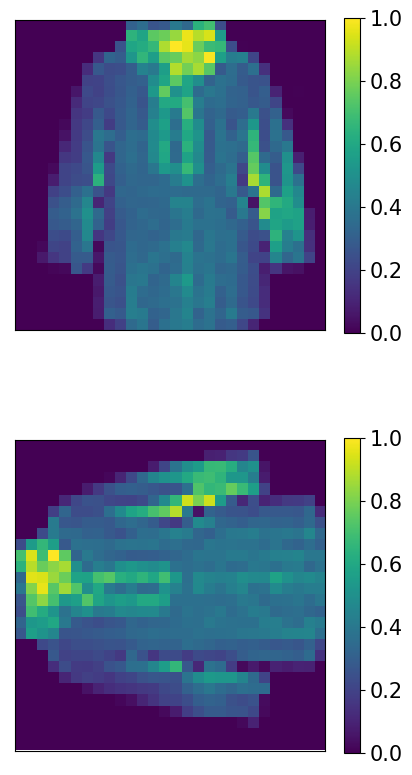

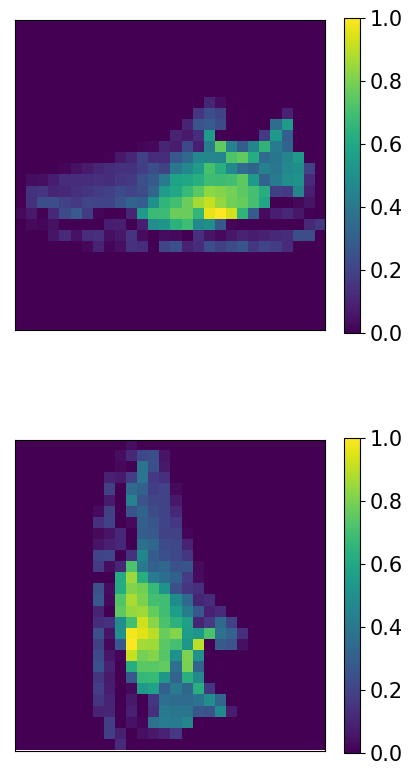

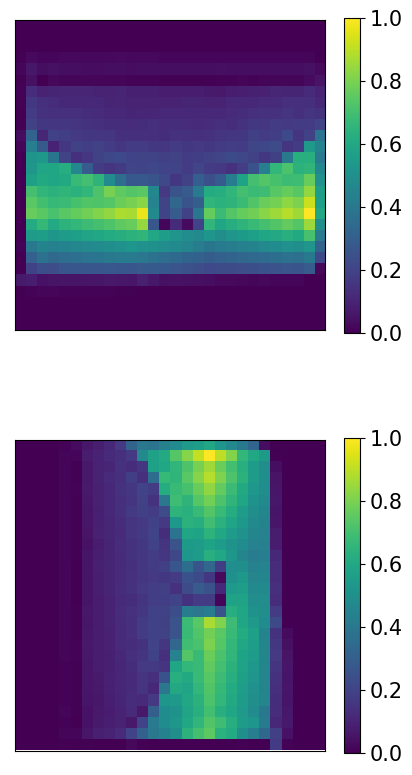

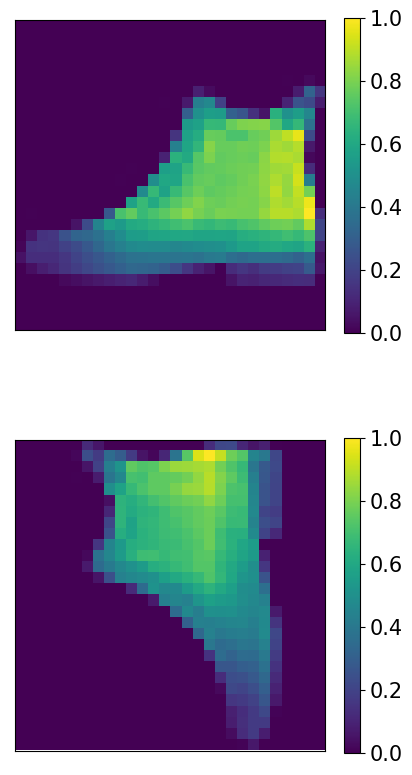

In [49]:
# Multiply attention maps with the original image
multiplied_attention_maps = []
print (mean_attention_maps[0].shape)
print (images_float[0].shape)
for i in range(len(images_float)):
    multiplied_attention_maps.append(mean_attention_maps[i].squeeze(2) * images_float[i])
print (multiplied_attention_maps[0].shape)

multiplied_attention_maps_transformed = []
for i in range(len(images_transformed_float)):
    multiplied_attention_maps_transformed.append(augmented_attention_maps[i].squeeze(2) * images_transformed_float[i])
print (multiplied_attention_maps_transformed[0].shape)

for i in range(len(multiplied_attention_maps)):
    multiplied_attention_maps[i] = (multiplied_attention_maps[i] - multiplied_attention_maps[i].min()) / (multiplied_attention_maps[i].max() - multiplied_attention_maps[i].min())
    multiplied_attention_maps_transformed[i] = (multiplied_attention_maps_transformed[i] - multiplied_attention_maps_transformed[i].min()) / (multiplied_attention_maps_transformed[i].max() - multiplied_attention_maps_transformed[i].min())


for i in range(len(multiplied_attention_maps)):

    #Plot the multiplied attention maps
    fig, axes = plt.subplots(2, 1, figsize=(5, 10))
    #fig.suptitle('Multiplied Attention Maps', fontsize=fontsize)

    # Plot multiplied attention map for original image
    im = axes[0].imshow(multiplied_attention_maps[i].detach().cpu().numpy(), cmap='viridis')
    axes[0].set_xticks([])
    axes[0].set_yticks([])
    cbar = fig.colorbar(im, ax=axes[0], shrink=0.9)
    cbar.ax.tick_params(labelsize=labelsize)

    # Plot multiplied attention map for transformed images
    im = axes[1].imshow(multiplied_attention_maps_transformed[i].detach().cpu().numpy(), cmap='viridis')
    axes[1].set_xticks([])
    axes[1].set_yticks([])
    cbar = fig.colorbar(im, ax=axes[1], shrink=0.9)
    cbar.ax.tick_params(labelsize=labelsize)

    plt.savefig(f'./IMAGES/EQUIVARIANZA/multiplied_attention_maps_transform{i}.png')

    plt.show()